Using the csv file to get the directory url for each image

In [1]:
import pandas as pd
import tensorflow as tf
import os.path

In [2]:
tf.__version__

'2.7.0'

From the image below, we can note the image name always starts with "coarse_tilt_aligned_face" followed by the face_id and then the original image name, all separated by a dot. We can use this pattern to create a new column called file_dir, this will enable us to easily read the images. The user_id is the folder where the image is contained.
![image](sample.png)

In [2]:
def get_filename():
    folder = age_data['user_id']
    sep = '.'
    face_id = age_data['face_id']
    orig_image = age_data['original_image']
    file_name = '\\'+ folder + '\\'+"coarse_tilt_aligned_face."+str(face_id) +sep+ orig_image
    return file_name

In [4]:
def decode_image(filename, image_type, resize_shape, channels=3):
    value = tf.io.read_file(filename)
    if image_type == 'png':
        decoded_image = tf.io.decode_png(value, channels=channels)
    elif image_type == 'jpg':
        decoded_image = tf.io.decode_jpeg(value, channels=channels)
    else:
        decoded_image = tf.io.decode_image(value, channels=channels)
    if resize_shape is not None and image_type in ['png', 'jpg']:
        decoded_image = tf.image.resize(decoded_image, resize_shape)
    return decoded_image

D:\The Great Big World of Machine Learning\Projects\datasets\AdienceBenchmarkGenderAndAgeClassification\faces


In [15]:
def get_dataset(image_paths, label_list, resize_shape, channels=3):
    def _map_fn(filename):
        extension = os.path.splitext(filename)[1][1:] #getting the file extension for the image type
        return decode_image(filename, image_type=extension, resize_shape=resize_shape, channels=channels)
    image_tensor = map(_map_fn, image_paths)
    label_tensor = tf.constant(label_list)
    dataset = tf.data.Dataset.from_tensor_slices(image_tensor, label_tensor)

    return dataset

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00'


In [4]:
dataset_dir = "D:\\The Great Big World of Machine Learning\Projects\datasets\AdienceBenchmarkGenderAndAgeClassification\\faces"
print(dataset_dir)

D:\The Great Big World of Machine Learning\Projects\datasets\AdienceBenchmarkGenderAndAgeClassification\faces


In [4]:
age_data = pd.read_csv("age_data.csv")
print(age_data.head(3))

gender_data = pd.read_csv("gender_data.csv")
print(gender_data.head(3))

        user_id                original_image  face_id        age
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1  (25 - 36)
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2  (25 - 36)
2  30601258@N03  10437979845_5985be4b26_o.jpg        1  (25 - 36)
        user_id                original_image  face_id gender
0  30601258@N03  10399646885_67c7d20df9_o.jpg        1      f
1  30601258@N03  10424815813_e94629b1ec_o.jpg        2      m
2  30601258@N03  10437979845_5985be4b26_o.jpg        1      f


In [5]:
image_paths = get_filename()

<tf.Tensor: shape=(18622,), dtype=string, numpy=
array([b'(25 - 36)', b'(25 - 36)', b'(25 - 36)', ..., b'(25 - 36)',
       b'(25 - 36)', b'(25 - 36)'], dtype=object)>

In [11]:
import matplotlib.pyplot as plt

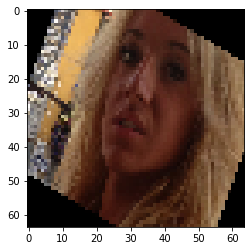

In [33]:
plt.imshow((dcd / 255.0).numpy())
plt.show()